### This note book is for the first questions 
#### When should I visit Seattle? The listing availabilities by months.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar=pd.read_csv('C:/Users/wizchu/DS/calendar.csv')
df_listings = pd.read_csv('C:/Users/wizchu/DS/listings.csv')
df_reviews = pd.read_csv('C:/Users/wizchu/DS/reviews.csv')

#### Understanding calendar data

In [13]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
# The price is only showing when the listing is avaiable, this can be used later 
df_calendar.loc[df_calendar['available'] =='f']['price'].shape
df_calendar.loc[df_calendar['available'] =='f']['price'].isnull().shape

(459028,)

In [14]:
# making the month and year columns  
df_calendar['month']=pd.to_datetime(df_calendar['date']).dt.month
df_calendar['year']=pd.to_datetime(df_calendar['date']).dt.year

In [15]:
# combine month and year to a column , so I can have the plot using YYYY-MM 
df_calendar['MonthYear'] = pd.to_datetime(df_calendar[['year', 'month']].assign(Day=1))

In [16]:
# I check one listing_id, just to better understand what is the data showing for month 
# find out that 2016-01 and 2017-01 have missing date, so maybe it is better to combine the two months 
df_calendar[(df_calendar['listing_id'] ==241032)].groupby(["MonthYear"]).count()

,listing_id,date,available,price,month,year
MonthYear,,,,,,
2016-01-01,28,28,28,12,28,28
2016-02-01,29,29,29,26,29,29
2016-03-01,31,31,31,31,31,31
2016-04-01,30,30,30,30,30,30
2016-05-01,31,31,31,31,31,31
2016-06-01,30,30,30,30,30,30
2016-07-01,31,31,31,31,31,31
2016-08-01,31,31,31,31,31,31
2016-09-01,30,30,30,30,30,30


Text(0.5,1,'Number of unique listings by month')

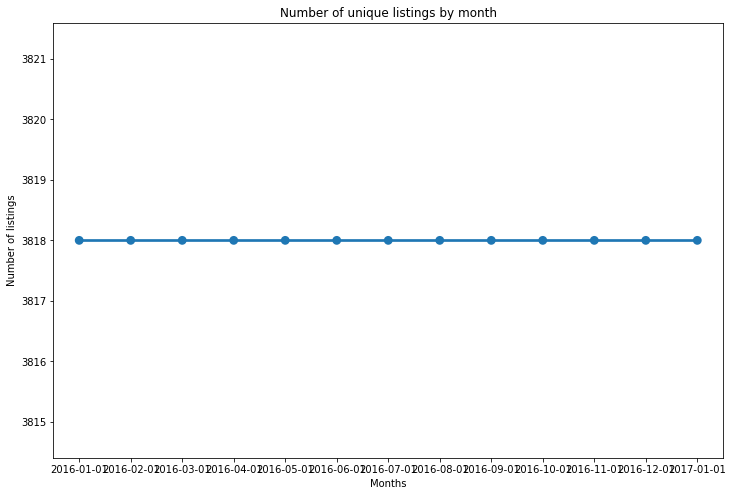

In [37]:
#every month has the same number of listing 
month_listing=df_calendar.groupby(['MonthYear'])["listing_id"].nunique()
month_listing=month_listing.to_frame().reset_index()
count = df_calendar.groupby(['MonthYear'])["listing_id"].nunique()

plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=month_listing,x=month_listing['MonthYear'].astype(str),y=month_listing['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of unique listings by month')

Text(0.5, 1.0, 'Number of unique listings by month')

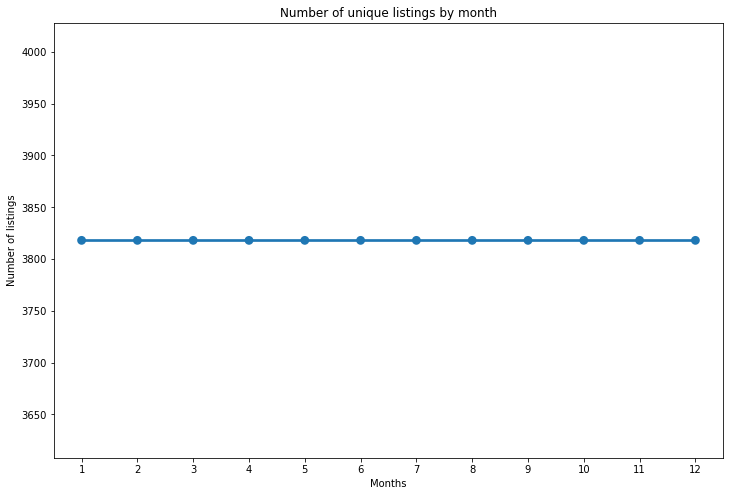

In [21]:
#combine the two months 2016-01 and 2017-01, look like even cmobining two months we have the same numbers of listings 
month_listing1=df_calendar.groupby(['month'])["listing_id"].nunique()
month_listing1=month_listing1.to_frame().reset_index()
count = df_calendar.groupby(['month'])["listing_id"].nunique()

plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=month_listing1,x=month_listing1['month'].astype(str),y=month_listing1['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of unique listings by month')

### To answer Q1: the available for each month  

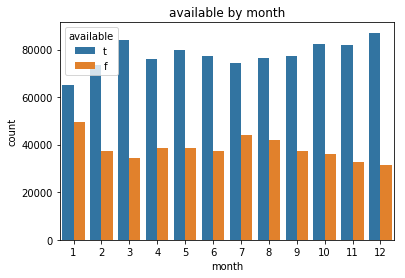

In [26]:
# in this plot, we can see the avaiablility and unavaiblity 
sns.countplot(data = df_calendar, x = df_calendar['month'], hue = 'available');
plt.title('available by month');

#### We can see the  avaiablility and unavaiblity  number for each month but seems every months has different dates, it's be easy for us to know which month is doing better using %

In [33]:
# combine two months 2016-01 and 2017-01 
# dispay every month available count ratio 
#I create a ration column using the month of not available lising / all listing 
ratio_each_month=df_calendar.loc[df_calendar['available'] =='f'].groupby(['month'])["listing_id"].count()/df_calendar.groupby(['month'])["listing_id"].count()

Text(0.5,1,'Ratio per Month')

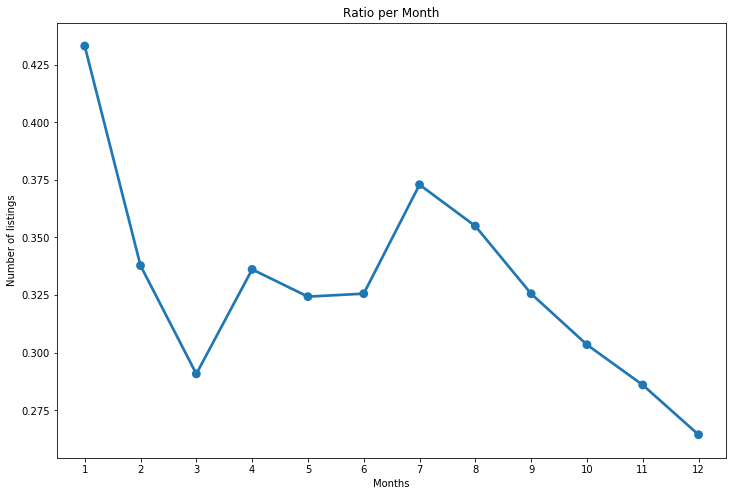

In [36]:
#ploting the chart 
ratio_each_month=ratio_each_month.to_frame()
plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=ratio_each_month,x=ratio_each_month.index,y=ratio_each_month['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Ratio per Month')

####  From the chart above, I know that Jan is the most popular most month and december is the least popular month. Now, I know which month is the most popular month, I want to know does that affect the price 


#### clean the data in order to compare 

In [24]:
# because I am looking at price only, I will drop all the unavaibale listing with price NaN
# drop the Nan Price
df_calendar1=df_calendar.dropna(subset = ["price"])

In [25]:
# to plot the data, I need to remove $
price=df_calendar1['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)
    
df_calendar1['price']=prices

<ipython-input-25-9f8932b031fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar1['price']=prices


In [26]:
df_calendar1.head()

,listing_id,date,available,price,month,year,MonthYear
0,241032,2016-01-04,t,85.0,1,2016,2016-01-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01-01
9,241032,2016-01-13,t,85.0,1,2016,2016-01-01
10,241032,2016-01-14,t,85.0,1,2016,2016-01-01
14,241032,2016-01-18,t,85.0,1,2016,2016-01-01


In [54]:
# I create a colulmn for average price by month
price_permonth=df_calendar1.groupby(["month"])["price"].mean()

In [55]:
price_permonth=price_permonth.to_frame()

Text(0.5,1,'mean for each month')

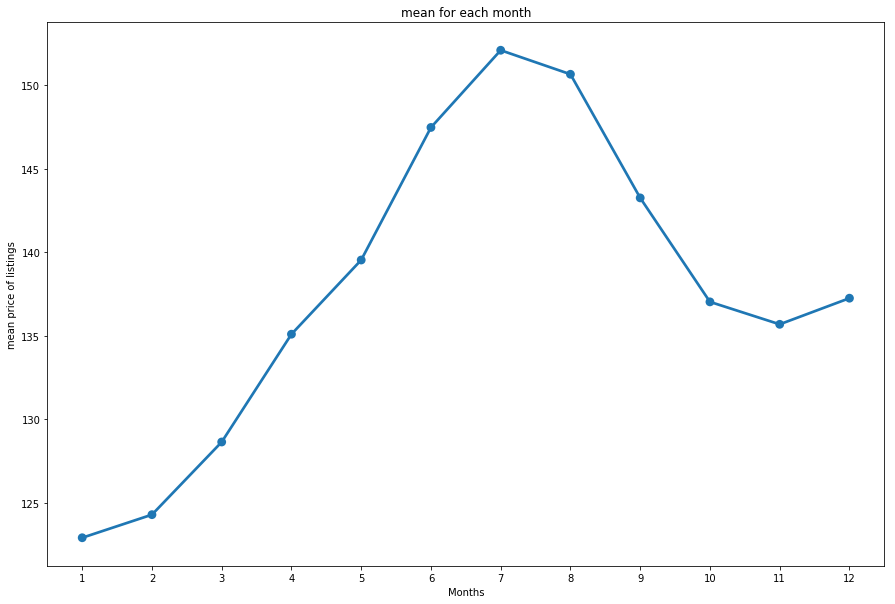

In [57]:
# this plot can tell me average price by month
plt.subplots(figsize = (15,10))
ax = sns.pointplot(data=price_permonth,x=price_permonth.index,y=price_permonth['price'])
plt.ylabel('mean price of listings')
plt.xlabel('Months')
plt.title('Mean for Each Month')

#### From this chart, we know highest pirce in in July and lowest price in Jan 

### From the findings, I know January is popular but it has the lowest price and July will not be a good time to visit Seattle because it is hard to book and has a higher price 

In [61]:
# just to check again the number 
df_calendar1.groupby(["month"])["price"].sum()

month
1      7981548.0
2      9113355.0
3     10798161.0
4     10272371.0
5     11159008.0
6     11391415.0
7     11288732.0
8     11502179.0
9     11065949.0
10    11296639.0
11    11096625.0
12    11949282.0
Name: price, dtype: float64

In [59]:
df_calendar1.groupby(["month"])["price"].count()

month
1     64937
2     73321
3     83938
4     76037
5     79971
6     77244
7     74222
8     76347
9     77246
10    82438
11    81780
12    87061
Name: price, dtype: int64